# Proses Input Data ISPU

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [2]:
df1 = pd.read_excel('DATA ISPU BERDASARKAN STASIUN.xlsx', sheet_name='DKI1')
df2 = pd.read_excel('DATA ISPU BERDASARKAN STASIUN.xlsx', sheet_name='DKI2')
df3 = pd.read_excel('DATA ISPU BERDASARKAN STASIUN.xlsx', sheet_name='DKI3')
df4 = pd.read_excel('DATA ISPU BERDASARKAN STASIUN.xlsx', sheet_name='DKI4')
df5 = pd.read_excel('DATA ISPU BERDASARKAN STASIUN.xlsx', sheet_name='DKI5')
df_concat = pd.concat([df1,df2,df3,df4,df5])
df_concat

,Tanggal,Wilayah,gp2y,mq136,mq7,mq131,mics6814,Max,Critical,Kategori
0,2017-01-01,DKI1,63.0,34.0,25.0,21.0,2.0,63.0,PM10,Sedang
1,2017-01-02,DKI1,16.0,32.0,16.0,19.0,1.0,32.0,SO2,Baik
2,2017-01-03,DKI1,18.0,32.0,17.0,20.0,2.0,32.0,SO2,Baik
3,2017-01-04,DKI1,24.0,32.0,22.0,20.0,2.0,32.0,SO2,Baik
4,2017-01-05,DKI1,29.0,32.0,25.0,14.0,2.0,32.0,SO2,Baik
...,...,...,...,...,...,...,...,...,...,...
1863,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54.0,36.0,14.0,21.0,47.0,76.0,PM25,SEDANG
1864,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,20.0,11.0,21.0,33.0,68.0,PM25,SEDANG
1865,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34.0,28.0,8.0,25.0,29.0,54.0,PM25,SEDANG
1866,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,25.0,15.0,23.0,44.0,75.0,PM25,SEDANG


In [3]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9507 entries, 0 to 1867
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   9507 non-null   datetime64[ns]
 1   Wilayah   9507 non-null   object        
 2   gp2y      9144 non-null   float64       
 3   mq136     9145 non-null   object        
 4   mq7       9195 non-null   float64       
 5   mq131     9166 non-null   float64       
 6   mics6814  9143 non-null   float64       
 7   Max       9398 non-null   object        
 8   Critical  9396 non-null   object        
 9   Kategori  9490 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 817.0+ KB


In [4]:
kategori = df_concat['Kategori'].value_counts().index

kategori_dict = {}
for kat in kategori:
    kat_t = str(kat)
    if kat_t not in kategori_dict.keys():
        kategori_dict[kat_t] = kat_t.lower()

kategori_dict

{'SEDANG': 'sedang',
 'TIDAK SEHAT': 'tidak sehat',
 'BAIK': 'baik',
 'Baik': 'baik',
 'Sedang': 'sedang',
 'TIDAK ADA DATA': 'tidak ada data',
 'SANGAT TIDAK SEHAT': 'sangat tidak sehat',
 'Tidak Sehat': 'tidak sehat',
 'Tidak Ada Data': 'tidak ada data'}

In [5]:
df_concat['Kategori'].replace(kategori_dict, inplace=True)
df_concat.Kategori.value_counts()

sedang                6263
baik                  1628
tidak sehat           1450
tidak ada data         108
sangat tidak sehat      41
Name: Kategori, dtype: int64

In [6]:
df_concat.Kategori.unique()

array(['sedang', 'baik', 'tidak ada data', 'tidak sehat',
       'sangat tidak sehat', nan], dtype=object)

In [7]:
df_concat = df_concat.fillna(round(df_concat.mean()))
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9507 entries, 0 to 1867
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   9507 non-null   datetime64[ns]
 1   Wilayah   9507 non-null   object        
 2   gp2y      9507 non-null   float64       
 3   mq136     9145 non-null   object        
 4   mq7       9507 non-null   float64       
 5   mq131     9507 non-null   float64       
 6   mics6814  9507 non-null   float64       
 7   Max       9398 non-null   object        
 8   Critical  9396 non-null   object        
 9   Kategori  9490 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 817.0+ KB


In [8]:
df_concat = df_concat.drop(['Max','Critical'],axis=1)
df_concat

,Tanggal,Wilayah,gp2y,mq136,mq7,mq131,mics6814,Kategori
0,2017-01-01,DKI1,63.0,34.0,25.0,21.0,2.0,sedang
1,2017-01-02,DKI1,16.0,32.0,16.0,19.0,1.0,baik
2,2017-01-03,DKI1,18.0,32.0,17.0,20.0,2.0,baik
3,2017-01-04,DKI1,24.0,32.0,22.0,20.0,2.0,baik
4,2017-01-05,DKI1,29.0,32.0,25.0,14.0,2.0,baik
...,...,...,...,...,...,...,...,...
1863,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54.0,36.0,14.0,21.0,47.0,sedang
1864,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,20.0,11.0,21.0,33.0,sedang
1865,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34.0,28.0,8.0,25.0,29.0,sedang
1866,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,25.0,15.0,23.0,44.0,sedang


In [9]:
df_concat["Kategori"].unique()

array(['sedang', 'baik', 'tidak ada data', 'tidak sehat',
       'sangat tidak sehat', nan], dtype=object)

In [10]:
df_concat.Kategori.value_counts()

sedang                6263
baik                  1628
tidak sehat           1450
tidak ada data         108
sangat tidak sehat      41
Name: Kategori, dtype: int64

In [11]:
df_concat = df_concat[df_concat.Kategori != 'tidak ada data']
df_concat

,Tanggal,Wilayah,gp2y,mq136,mq7,mq131,mics6814,Kategori
0,2017-01-01,DKI1,63.0,34.0,25.0,21.0,2.0,sedang
1,2017-01-02,DKI1,16.0,32.0,16.0,19.0,1.0,baik
2,2017-01-03,DKI1,18.0,32.0,17.0,20.0,2.0,baik
3,2017-01-04,DKI1,24.0,32.0,22.0,20.0,2.0,baik
4,2017-01-05,DKI1,29.0,32.0,25.0,14.0,2.0,baik
...,...,...,...,...,...,...,...,...
1863,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54.0,36.0,14.0,21.0,47.0,sedang
1864,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,20.0,11.0,21.0,33.0,sedang
1865,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34.0,28.0,8.0,25.0,29.0,sedang
1866,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,25.0,15.0,23.0,44.0,sedang


In [12]:
df_concat = df_concat.fillna(round(df_concat.mean()))
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9399 entries, 0 to 1867
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   9399 non-null   datetime64[ns]
 1   Wilayah   9399 non-null   object        
 2   gp2y      9399 non-null   float64       
 3   mq136     9145 non-null   object        
 4   mq7       9399 non-null   float64       
 5   mq131     9399 non-null   float64       
 6   mics6814  9399 non-null   float64       
 7   Kategori  9382 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 660.9+ KB


In [13]:
df_concat = df_concat.dropna()
df_concat

,Tanggal,Wilayah,gp2y,mq136,mq7,mq131,mics6814,Kategori
0,2017-01-01,DKI1,63.0,34.0,25.0,21.0,2.0,sedang
1,2017-01-02,DKI1,16.0,32.0,16.0,19.0,1.0,baik
2,2017-01-03,DKI1,18.0,32.0,17.0,20.0,2.0,baik
3,2017-01-04,DKI1,24.0,32.0,22.0,20.0,2.0,baik
4,2017-01-05,DKI1,29.0,32.0,25.0,14.0,2.0,baik
...,...,...,...,...,...,...,...,...
1863,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54.0,36.0,14.0,21.0,47.0,sedang
1864,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,20.0,11.0,21.0,33.0,sedang
1865,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34.0,28.0,8.0,25.0,29.0,sedang
1866,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,25.0,15.0,23.0,44.0,sedang


In [14]:
df_concat = df_concat[:200]
df_concat

,Tanggal,Wilayah,gp2y,mq136,mq7,mq131,mics6814,Kategori
0,2017-01-01,DKI1,63.0,34.0,25.0,21.0,2.0,sedang
1,2017-01-02,DKI1,16.0,32.0,16.0,19.0,1.0,baik
2,2017-01-03,DKI1,18.0,32.0,17.0,20.0,2.0,baik
3,2017-01-04,DKI1,24.0,32.0,22.0,20.0,2.0,baik
4,2017-01-05,DKI1,29.0,32.0,25.0,14.0,2.0,baik
...,...,...,...,...,...,...,...,...
214,2017-08-03,DKI1,42.0,17.0,18.0,80.0,7.0,sedang
215,2017-08-04,DKI1,52.0,18.0,18.0,97.0,7.0,sedang
216,2017-08-05,DKI1,62.0,18.0,19.0,90.0,7.0,sedang
217,2017-08-06,DKI1,61.0,18.0,19.0,90.0,5.0,sedang


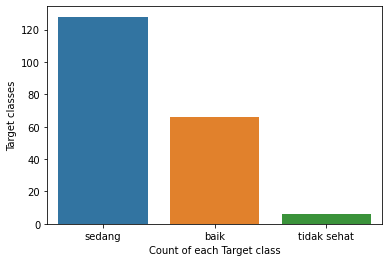

In [15]:
sns.countplot(df_concat['Kategori'])
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [16]:
le = LabelEncoder()
df_concat['Kategori'] = le.fit_transform(df_concat['Kategori'])
df_concat

,Tanggal,Wilayah,gp2y,mq136,mq7,mq131,mics6814,Kategori
0,2017-01-01,DKI1,63.0,34.0,25.0,21.0,2.0,1
1,2017-01-02,DKI1,16.0,32.0,16.0,19.0,1.0,0
2,2017-01-03,DKI1,18.0,32.0,17.0,20.0,2.0,0
3,2017-01-04,DKI1,24.0,32.0,22.0,20.0,2.0,0
4,2017-01-05,DKI1,29.0,32.0,25.0,14.0,2.0,0
...,...,...,...,...,...,...,...,...
214,2017-08-03,DKI1,42.0,17.0,18.0,80.0,7.0,1
215,2017-08-04,DKI1,52.0,18.0,18.0,97.0,7.0,1
216,2017-08-05,DKI1,62.0,18.0,19.0,90.0,7.0,1
217,2017-08-06,DKI1,61.0,18.0,19.0,90.0,5.0,1


In [17]:
X_train = df_concat.drop(['Tanggal','Wilayah','Kategori'], axis=1)
y_train = df_concat['Kategori']

# Subscribe Antares

In [18]:
# from antares_http import antares

# antares.setDebug(False)
# antares.setAccessKey('16b15659024fd846:fb77a780be6d9042')

# latestData = antares.get('star', 'Data')
# print(latestData['content'])

In [19]:
# import time
# waktu = []
# json = []
# runtime = 0
# try:
#     while True:
#         now = datetime.now()
#         latestData = antares.get('star', 'Data')
#         print(latestData['content'])
#         json.append(latestData['content'])
#         waktu.append(now)
#         time.sleep(900.0 - ((0) % 900.0))
#         if len(json) == 30:
#             break
#             #do_something()
#             #print("Hallo")
#         #animals.append(wild_animals)
# except KeyboardInterrupt:
#     pass

In [20]:
# import pandas as pd
# import csv
# json
# waktu = pd.to_datetime(waktu)
# df = pd.DataFrame(json)
# df['waktu'] = waktu
# df

In [21]:
# df.to_csv("Node1 D2.csv", index=False)

In [22]:
df = pd.read_csv('Data Pengujian Sensor Node 1')
df

,mq131,mq136,mq7,no2,gp2y,waktu
0,406.9772,1.298552,0.807717,3.47,166.883900,2023-02-02 09:31:13.270399
1,414.0262,1.212863,0.777511,3.46,85.119350,2023-02-02 09:46:13.351917
2,415.0461,0.978206,0.766739,3.42,10.045160,2023-02-02 10:01:13.556085
3,432.9031,1.001205,0.793880,3.36,224.464500,2023-02-02 10:16:13.644700
4,422.2794,0.919199,0.745529,3.38,135.187100,2023-02-02 10:31:13.746660
5,417.0961,1.048680,0.694396,3.41,106.122600,2023-02-02 10:46:13.819588
6,422.2794,0.897916,0.766739,3.27,0.000000,2023-02-02 11:01:13.900175
7,426.4870,0.785488,0.711991,3.25,115.993600,2023-02-02 11:16:13.983368
8,433.9848,0.810734,0.717077,3.35,8.454838,2023-02-02 11:31:14.047450
9,423.3261,0.817159,0.711991,3.34,224.464500,2023-02-02 11:46:14.117974


In [23]:
def get_O3_subindex(x):
#     a = x/10
#     return a
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0
df["O3_SubIndex"] = df["mq131"].apply(lambda x: get_O3_subindex(x))
df

,mq131,mq136,mq7,no2,gp2y,waktu,O3_SubIndex
0,406.9772,1.298552,0.807717,3.47,166.883900,2023-02-02 09:31:13.270399,336.915993
1,414.0262,1.212863,0.777511,3.46,85.119350,2023-02-02 09:46:13.351917,338.223785
2,415.0461,0.978206,0.766739,3.42,10.045160,2023-02-02 10:01:13.556085,338.413006
3,432.9031,1.001205,0.793880,3.36,224.464500,2023-02-02 10:16:13.644700,341.725993
4,422.2794,0.919199,0.745529,3.38,135.187100,2023-02-02 10:31:13.746660,339.754991
5,417.0961,1.048680,0.694396,3.41,106.122600,2023-02-02 10:46:13.819588,338.793340
6,422.2794,0.897916,0.766739,3.27,0.000000,2023-02-02 11:01:13.900175,339.754991
7,426.4870,0.785488,0.711991,3.25,115.993600,2023-02-02 11:16:13.983368,340.535622
8,433.9848,0.810734,0.717077,3.35,8.454838,2023-02-02 11:31:14.047450,341.926679
9,423.3261,0.817159,0.711991,3.34,224.464500,2023-02-02 11:46:14.117974,339.949184


In [24]:
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NO2_SubIndex"] = df["no2"].apply(lambda x: get_NO2_subindex(x))
df

,mq131,mq136,mq7,no2,gp2y,waktu,O3_SubIndex,NO2_SubIndex
0,406.9772,1.298552,0.807717,3.47,166.883900,2023-02-02 09:31:13.270399,336.915993,4.3375
1,414.0262,1.212863,0.777511,3.46,85.119350,2023-02-02 09:46:13.351917,338.223785,4.3250
2,415.0461,0.978206,0.766739,3.42,10.045160,2023-02-02 10:01:13.556085,338.413006,4.2750
3,432.9031,1.001205,0.793880,3.36,224.464500,2023-02-02 10:16:13.644700,341.725993,4.2000
4,422.2794,0.919199,0.745529,3.38,135.187100,2023-02-02 10:31:13.746660,339.754991,4.2250
5,417.0961,1.048680,0.694396,3.41,106.122600,2023-02-02 10:46:13.819588,338.793340,4.2625
6,422.2794,0.897916,0.766739,3.27,0.000000,2023-02-02 11:01:13.900175,339.754991,4.0875
7,426.4870,0.785488,0.711991,3.25,115.993600,2023-02-02 11:16:13.983368,340.535622,4.0625
8,433.9848,0.810734,0.717077,3.35,8.454838,2023-02-02 11:31:14.047450,341.926679,4.1875
9,423.3261,0.817159,0.711991,3.34,224.464500,2023-02-02 11:46:14.117974,339.949184,4.1750


In [25]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["gp2y"].apply(lambda x: get_PM10_subindex(x))
df

,mq131,mq136,mq7,no2,gp2y,waktu,O3_SubIndex,NO2_SubIndex,PM10_SubIndex
0,406.9772,1.298552,0.807717,3.47,166.883900,2023-02-02 09:31:13.270399,336.915993,4.3375,144.589267
1,414.0262,1.212863,0.777511,3.46,85.119350,2023-02-02 09:46:13.351917,338.223785,4.3250,85.119350
2,415.0461,0.978206,0.766739,3.42,10.045160,2023-02-02 10:01:13.556085,338.413006,4.2750,10.045160
3,432.9031,1.001205,0.793880,3.36,224.464500,2023-02-02 10:16:13.644700,341.725993,4.2000,182.976333
4,422.2794,0.919199,0.745529,3.38,135.187100,2023-02-02 10:31:13.746660,339.754991,4.2250,123.458067
5,417.0961,1.048680,0.694396,3.41,106.122600,2023-02-02 10:46:13.819588,338.793340,4.2625,104.081733
6,422.2794,0.897916,0.766739,3.27,0.000000,2023-02-02 11:01:13.900175,339.754991,4.0875,0.000000
7,426.4870,0.785488,0.711991,3.25,115.993600,2023-02-02 11:16:13.983368,340.535622,4.0625,110.662400
8,433.9848,0.810734,0.717077,3.35,8.454838,2023-02-02 11:31:14.047450,341.926679,4.1875,8.454838
9,423.3261,0.817159,0.711991,3.34,224.464500,2023-02-02 11:46:14.117974,339.949184,4.1750,182.976333


In [26]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["mq7"].apply(lambda x: get_CO_subindex(x))
df

,mq131,mq136,mq7,no2,gp2y,waktu,O3_SubIndex,NO2_SubIndex,PM10_SubIndex,CO_SubIndex
0,406.9772,1.298552,0.807717,3.47,166.883900,2023-02-02 09:31:13.270399,336.915993,4.3375,144.589267,40.38585
1,414.0262,1.212863,0.777511,3.46,85.119350,2023-02-02 09:46:13.351917,338.223785,4.3250,85.119350,38.87555
2,415.0461,0.978206,0.766739,3.42,10.045160,2023-02-02 10:01:13.556085,338.413006,4.2750,10.045160,38.33695
3,432.9031,1.001205,0.793880,3.36,224.464500,2023-02-02 10:16:13.644700,341.725993,4.2000,182.976333,39.69400
4,422.2794,0.919199,0.745529,3.38,135.187100,2023-02-02 10:31:13.746660,339.754991,4.2250,123.458067,37.27645
5,417.0961,1.048680,0.694396,3.41,106.122600,2023-02-02 10:46:13.819588,338.793340,4.2625,104.081733,34.71980
6,422.2794,0.897916,0.766739,3.27,0.000000,2023-02-02 11:01:13.900175,339.754991,4.0875,0.000000,38.33695
7,426.4870,0.785488,0.711991,3.25,115.993600,2023-02-02 11:16:13.983368,340.535622,4.0625,110.662400,35.59955
8,433.9848,0.810734,0.717077,3.35,8.454838,2023-02-02 11:31:14.047450,341.926679,4.1875,8.454838,35.85385
9,423.3261,0.817159,0.711991,3.34,224.464500,2023-02-02 11:46:14.117974,339.949184,4.1750,182.976333,35.59955


In [27]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["mq136"].apply(lambda x: get_SO2_subindex(x))
df

,mq131,mq136,mq7,no2,gp2y,waktu,O3_SubIndex,NO2_SubIndex,PM10_SubIndex,CO_SubIndex,SO2_SubIndex
0,406.9772,1.298552,0.807717,3.47,166.883900,2023-02-02 09:31:13.270399,336.915993,4.3375,144.589267,40.38585,1.623190
1,414.0262,1.212863,0.777511,3.46,85.119350,2023-02-02 09:46:13.351917,338.223785,4.3250,85.119350,38.87555,1.516079
2,415.0461,0.978206,0.766739,3.42,10.045160,2023-02-02 10:01:13.556085,338.413006,4.2750,10.045160,38.33695,1.222757
3,432.9031,1.001205,0.793880,3.36,224.464500,2023-02-02 10:16:13.644700,341.725993,4.2000,182.976333,39.69400,1.251506
4,422.2794,0.919199,0.745529,3.38,135.187100,2023-02-02 10:31:13.746660,339.754991,4.2250,123.458067,37.27645,1.148999
5,417.0961,1.048680,0.694396,3.41,106.122600,2023-02-02 10:46:13.819588,338.793340,4.2625,104.081733,34.71980,1.310850
6,422.2794,0.897916,0.766739,3.27,0.000000,2023-02-02 11:01:13.900175,339.754991,4.0875,0.000000,38.33695,1.122395
7,426.4870,0.785488,0.711991,3.25,115.993600,2023-02-02 11:16:13.983368,340.535622,4.0625,110.662400,35.59955,0.981860
8,433.9848,0.810734,0.717077,3.35,8.454838,2023-02-02 11:31:14.047450,341.926679,4.1875,8.454838,35.85385,1.013417
9,423.3261,0.817159,0.711991,3.34,224.464500,2023-02-02 11:46:14.117974,339.949184,4.1750,182.976333,35.59955,1.021449


In [28]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Baik"
    elif x <= 100:
        return "Sedang"
    elif x <= 200:
        return "Tidak Baik"
    elif x <= 300:
        return "Sangat Tidak Baik"
    elif x <= 400:
        return "Sangat Tidak Baik"
    elif x > 400:
        return "Sangat Tidak Baik"
    else:
        return np.NaN

df["AQI_calculated"] = round(df[["SO2_SubIndex","CO_SubIndex","NO2_SubIndex", "PM10_SubIndex","O3_SubIndex"]].max(axis = 1))
# df["AQI_calculated"] = round(df[["SO2_SubIndex","CO_SubIndex","NO2_SubIndex", "PM10_SubIndex","O3_SubIndex"]].mean(axis = 1))

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df

,mq131,mq136,mq7,no2,gp2y,waktu,O3_SubIndex,NO2_SubIndex,PM10_SubIndex,CO_SubIndex,SO2_SubIndex,AQI_calculated,AQI_bucket_calculated
0,406.9772,1.298552,0.807717,3.47,166.883900,2023-02-02 09:31:13.270399,336.915993,4.3375,144.589267,40.38585,1.623190,337.0,Sangat Tidak Baik
1,414.0262,1.212863,0.777511,3.46,85.119350,2023-02-02 09:46:13.351917,338.223785,4.3250,85.119350,38.87555,1.516079,338.0,Sangat Tidak Baik
2,415.0461,0.978206,0.766739,3.42,10.045160,2023-02-02 10:01:13.556085,338.413006,4.2750,10.045160,38.33695,1.222757,338.0,Sangat Tidak Baik
3,432.9031,1.001205,0.793880,3.36,224.464500,2023-02-02 10:16:13.644700,341.725993,4.2000,182.976333,39.69400,1.251506,342.0,Sangat Tidak Baik
4,422.2794,0.919199,0.745529,3.38,135.187100,2023-02-02 10:31:13.746660,339.754991,4.2250,123.458067,37.27645,1.148999,340.0,Sangat Tidak Baik
5,417.0961,1.048680,0.694396,3.41,106.122600,2023-02-02 10:46:13.819588,338.793340,4.2625,104.081733,34.71980,1.310850,339.0,Sangat Tidak Baik
6,422.2794,0.897916,0.766739,3.27,0.000000,2023-02-02 11:01:13.900175,339.754991,4.0875,0.000000,38.33695,1.122395,340.0,Sangat Tidak Baik
7,426.4870,0.785488,0.711991,3.25,115.993600,2023-02-02 11:16:13.983368,340.535622,4.0625,110.662400,35.59955,0.981860,341.0,Sangat Tidak Baik
8,433.9848,0.810734,0.717077,3.35,8.454838,2023-02-02 11:31:14.047450,341.926679,4.1875,8.454838,35.85385,1.013417,342.0,Sangat Tidak Baik
9,423.3261,0.817159,0.711991,3.34,224.464500,2023-02-02 11:46:14.117974,339.949184,4.1750,182.976333,35.59955,1.021449,340.0,Sangat Tidak Baik


In [29]:
df_klasifikasi = df.drop(['mq131','mq136','mq7','no2','gp2y','waktu'],axis=1)
df_klasifikasi

,O3_SubIndex,NO2_SubIndex,PM10_SubIndex,CO_SubIndex,SO2_SubIndex,AQI_calculated,AQI_bucket_calculated
0,336.915993,4.3375,144.589267,40.38585,1.623190,337.0,Sangat Tidak Baik
1,338.223785,4.3250,85.119350,38.87555,1.516079,338.0,Sangat Tidak Baik
2,338.413006,4.2750,10.045160,38.33695,1.222757,338.0,Sangat Tidak Baik
3,341.725993,4.2000,182.976333,39.69400,1.251506,342.0,Sangat Tidak Baik
4,339.754991,4.2250,123.458067,37.27645,1.148999,340.0,Sangat Tidak Baik
5,338.793340,4.2625,104.081733,34.71980,1.310850,339.0,Sangat Tidak Baik
6,339.754991,4.0875,0.000000,38.33695,1.122395,340.0,Sangat Tidak Baik
7,340.535622,4.0625,110.662400,35.59955,0.981860,341.0,Sangat Tidak Baik
8,341.926679,4.1875,8.454838,35.85385,1.013417,342.0,Sangat Tidak Baik
9,339.949184,4.1750,182.976333,35.59955,1.021449,340.0,Sangat Tidak Baik


In [30]:
le = LabelEncoder()
df_klasifikasi['AQI_bucket_calculated'] = le.fit_transform(df_klasifikasi['AQI_bucket_calculated'])
df_klasifikasi['AQI_bucket_calculated'] = df_klasifikasi['AQI_bucket_calculated'].replace(0,1)
df_klasifikasi

,O3_SubIndex,NO2_SubIndex,PM10_SubIndex,CO_SubIndex,SO2_SubIndex,AQI_calculated,AQI_bucket_calculated
0,336.915993,4.3375,144.589267,40.38585,1.623190,337.0,1
1,338.223785,4.3250,85.119350,38.87555,1.516079,338.0,1
2,338.413006,4.2750,10.045160,38.33695,1.222757,338.0,1
3,341.725993,4.2000,182.976333,39.69400,1.251506,342.0,1
4,339.754991,4.2250,123.458067,37.27645,1.148999,340.0,1
5,338.793340,4.2625,104.081733,34.71980,1.310850,339.0,1
6,339.754991,4.0875,0.000000,38.33695,1.122395,340.0,1
7,340.535622,4.0625,110.662400,35.59955,0.981860,341.0,1
8,341.926679,4.1875,8.454838,35.85385,1.013417,342.0,1
9,339.949184,4.1750,182.976333,35.59955,1.021449,340.0,1


In [31]:
X_test = df_klasifikasi.drop(['AQI_calculated','AQI_bucket_calculated'],axis=1)
y_test = df_klasifikasi['AQI_bucket_calculated']

# Support Vector Machine

In [32]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [33]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf',gamma=1, C=1)
clf.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [34]:
X_test

array([[-1.10725139e-01,  2.27121703e+00,  3.02021060e-01,
         2.19943052e+00,  3.03236494e+00],
       [ 2.54398988e-01,  2.15353739e+00, -8.66190213e-01,
         1.44556967e+00,  2.49418687e+00],
       [ 3.07227772e-01,  1.68281884e+00, -2.34092769e+00,
         1.17672940e+00,  1.02040084e+00],
       [ 1.23218472e+00,  9.76741004e-01,  1.05608642e+00,
         1.85409606e+00,  1.16484828e+00],
       [ 6.81898270e-01,  1.21210028e+00, -1.13074629e-01,
         6.47384604e-01,  6.49801653e-01],
       [ 4.13413679e-01,  1.56513920e+00, -4.93698183e-01,
        -6.28758123e-01,  1.46301962e+00],
       [ 6.81898270e-01, -8.23757473e-02, -2.53825215e+00,
         1.17672940e+00,  5.16131709e-01],
       [ 8.99843550e-01, -3.17735025e-01, -3.64429312e-01,
        -1.89634049e-01, -1.89983242e-01],
       [ 1.28821462e+00,  8.59061365e-01, -2.37216756e+00,
        -6.27011111e-02, -3.14232919e-02],
       [ 7.36115241e-01,  7.41381726e-01,  1.05608642e+00,
        -1.89634049e-01

In [35]:
y_pred = clf.predict(X_test)
print('Accuracy Radial Basis Kernel:', y_pred)

Accuracy Radial Basis Kernel: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1]


In [36]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [37]:
# Using MAPE error metrics to check for the error rate and accuracy level
SVR_MAPE= MAPE(y_test,y_pred)
print("MAPE: ",SVR_MAPE)

MAPE:  30.0


In [38]:
df_label = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
mapping = {0: 'Tidak Baik', 1:'Sangat Tidak Baik'}
df_label = df_label.replace({'Real Values': mapping, 'Predicted Values': mapping})
df_label

,Real Values,Predicted Values
0,Sangat Tidak Baik,Sangat Tidak Baik
1,Sangat Tidak Baik,Sangat Tidak Baik
2,Sangat Tidak Baik,Sangat Tidak Baik
3,Sangat Tidak Baik,Sangat Tidak Baik
4,Sangat Tidak Baik,Sangat Tidak Baik
5,Sangat Tidak Baik,Sangat Tidak Baik
6,Sangat Tidak Baik,Sangat Tidak Baik
7,Sangat Tidak Baik,Sangat Tidak Baik
8,Sangat Tidak Baik,Sangat Tidak Baik
9,Sangat Tidak Baik,Sangat Tidak Baik


In [39]:
clf.score(X_test,y_test)

0.7

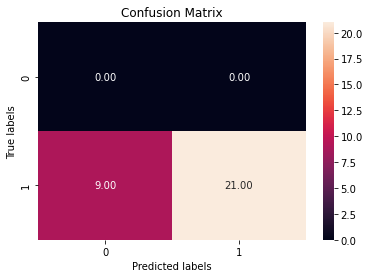

In [40]:
# melihat hasil tabel kebenaran confussion matrix

ax= plt.subplot()
y_pred = clf.predict(X_test)

# y_pred = y_pred.argmax(axis = 1)
# y_predht = (y_predht > 0.5)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# SVM + PCA

In [41]:
X_train

array([[ 1.17870911,  3.1073749 ,  0.5093324 , -1.29420167, -1.22072573],
       [-2.1931307 ,  2.80721794, -1.33162809, -1.37157138, -1.75496019],
       [-2.04964816,  2.80721794, -1.12707692, -1.33288652, -1.22072573],
       [-1.61920052,  2.80721794, -0.10432109, -1.33288652, -1.22072573],
       [-1.26049416,  2.80721794,  0.5093324 , -1.56499563, -1.22072573],
       [-1.83442434,  2.65713947,  0.30478124, -1.41025623, -1.22072573],
       [-1.18875289,  2.80721794, -0.10432109, -1.44894108, -0.68649128],
       [-1.26049416,  2.95729642, -1.12707692, -1.37157138, -1.22072573],
       [-1.26049416,  2.80721794,  0.10023007, -1.60368048, -1.22072573],
       [-0.61482271,  2.80721794,  2.35029289, -1.29420167, -0.15225682],
       [-1.54745925,  2.80721794,  0.5093324 , -1.33288652, -1.22072573],
       [-1.26049416,  2.80721794,  0.10023007, -1.44894108, -1.22072573],
       [-1.26049416,  2.80721794, -0.71797459, -1.64236533, -1.75496019],
       [-1.76268307,  2.65713947, -1.1

In [42]:
pca = PCA(n_components=5)
scaler = StandardScaler()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

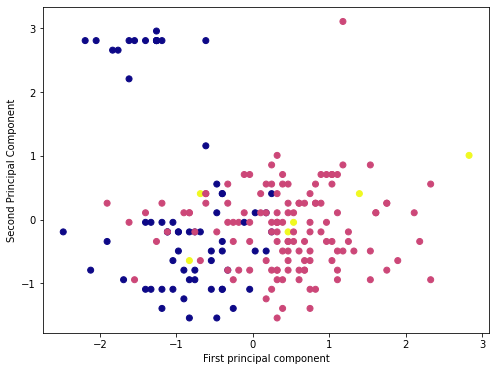

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Cumulative Variances (Percentage):
[ 46.62305219  68.81639341  85.23042527  93.8450445  100.        ]
Number of components: 5


Text(0, 0.5, 'Explained variance (%)')

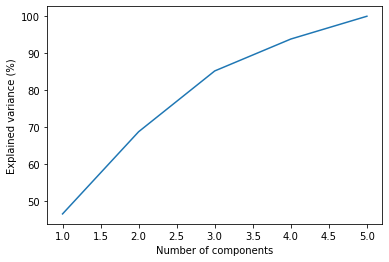

In [44]:
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# 
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [45]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# print(f"'X' shape: {X.shape}")
# print(f"'y' shape: {y.shape}")
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [46]:
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = svm.SVC()
SVC_model = Pipeline([
('std_scaler', _sc),
('pca', _pca),
('model', _model)
])

# train the model using the PCA components
SVC_model.fit(X_train_pca,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', SVC())])

In [47]:
SVC_model.score(X_test_pca,y_test)

0.6666666666666666

In [48]:
y_pred = clf.predict(X_test_pca)
print('Accuracy Radial Basis Kernel:', y_pred)

Accuracy Radial Basis Kernel: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1]


In [49]:
df_label = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
mapping = {0: 'Tidak Baik', 1:'Sangat Tidak Baik'}
df_label = df_label.replace({'Real Values': mapping, 'Predicted Values': mapping})
df_label

,Real Values,Predicted Values
0,Sangat Tidak Baik,Sangat Tidak Baik
1,Sangat Tidak Baik,Sangat Tidak Baik
2,Sangat Tidak Baik,Sangat Tidak Baik
3,Sangat Tidak Baik,Sangat Tidak Baik
4,Sangat Tidak Baik,Sangat Tidak Baik
5,Sangat Tidak Baik,Sangat Tidak Baik
6,Sangat Tidak Baik,Sangat Tidak Baik
7,Sangat Tidak Baik,Sangat Tidak Baik
8,Sangat Tidak Baik,Sangat Tidak Baik
9,Sangat Tidak Baik,Sangat Tidak Baik


# SVM + Smote

In [50]:
X_train = df_concat.drop(['Tanggal','Wilayah','Kategori'], axis=1)
y_train = df_concat['Kategori']

In [51]:
y_train

0      1
1      0
2      0
3      0
4      0
      ..
214    1
215    1
216    1
217    1
218    1
Name: Kategori, Length: 200, dtype: int32

In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [53]:
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 128, 0: 128, 2: 128})


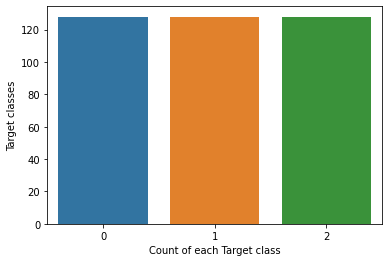

In [54]:
sns.countplot(y_train)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [55]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)

In [56]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
clf.score(X_test,y_test)

0.5333333333333333

In [58]:
y_pred = clf.predict(X_test)
print('Accuracy Radial Basis Kernel:', y_pred)

Accuracy Radial Basis Kernel: [1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0]


In [59]:
df_label = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
mapping = {0: 'Tidak Baik', 1:'Sangat Tidak Baik'}
df_label = df_label.replace({'Real Values': mapping, 'Predicted Values': mapping})
df_label

,Real Values,Predicted Values
0,Sangat Tidak Baik,Sangat Tidak Baik
1,Sangat Tidak Baik,Sangat Tidak Baik
2,Sangat Tidak Baik,Sangat Tidak Baik
3,Sangat Tidak Baik,2
4,Sangat Tidak Baik,Sangat Tidak Baik
5,Sangat Tidak Baik,Sangat Tidak Baik
6,Sangat Tidak Baik,Sangat Tidak Baik
7,Sangat Tidak Baik,Sangat Tidak Baik
8,Sangat Tidak Baik,Sangat Tidak Baik
9,Sangat Tidak Baik,Sangat Tidak Baik


# Prediction

In [60]:
df

,mq131,mq136,mq7,no2,gp2y,waktu,O3_SubIndex,NO2_SubIndex,PM10_SubIndex,CO_SubIndex,SO2_SubIndex,AQI_calculated,AQI_bucket_calculated
0,406.9772,1.298552,0.807717,3.47,166.883900,2023-02-02 09:31:13.270399,336.915993,4.3375,144.589267,40.38585,1.623190,337.0,Sangat Tidak Baik
1,414.0262,1.212863,0.777511,3.46,85.119350,2023-02-02 09:46:13.351917,338.223785,4.3250,85.119350,38.87555,1.516079,338.0,Sangat Tidak Baik
2,415.0461,0.978206,0.766739,3.42,10.045160,2023-02-02 10:01:13.556085,338.413006,4.2750,10.045160,38.33695,1.222757,338.0,Sangat Tidak Baik
3,432.9031,1.001205,0.793880,3.36,224.464500,2023-02-02 10:16:13.644700,341.725993,4.2000,182.976333,39.69400,1.251506,342.0,Sangat Tidak Baik
4,422.2794,0.919199,0.745529,3.38,135.187100,2023-02-02 10:31:13.746660,339.754991,4.2250,123.458067,37.27645,1.148999,340.0,Sangat Tidak Baik
5,417.0961,1.048680,0.694396,3.41,106.122600,2023-02-02 10:46:13.819588,338.793340,4.2625,104.081733,34.71980,1.310850,339.0,Sangat Tidak Baik
6,422.2794,0.897916,0.766739,3.27,0.000000,2023-02-02 11:01:13.900175,339.754991,4.0875,0.000000,38.33695,1.122395,340.0,Sangat Tidak Baik
7,426.4870,0.785488,0.711991,3.25,115.993600,2023-02-02 11:16:13.983368,340.535622,4.0625,110.662400,35.59955,0.981860,341.0,Sangat Tidak Baik
8,433.9848,0.810734,0.717077,3.35,8.454838,2023-02-02 11:31:14.047450,341.926679,4.1875,8.454838,35.85385,1.013417,342.0,Sangat Tidak Baik
9,423.3261,0.817159,0.711991,3.34,224.464500,2023-02-02 11:46:14.117974,339.949184,4.1750,182.976333,35.59955,1.021449,340.0,Sangat Tidak Baik


<AxesSubplot:xlabel='waktu', ylabel='AQI_calculated'>

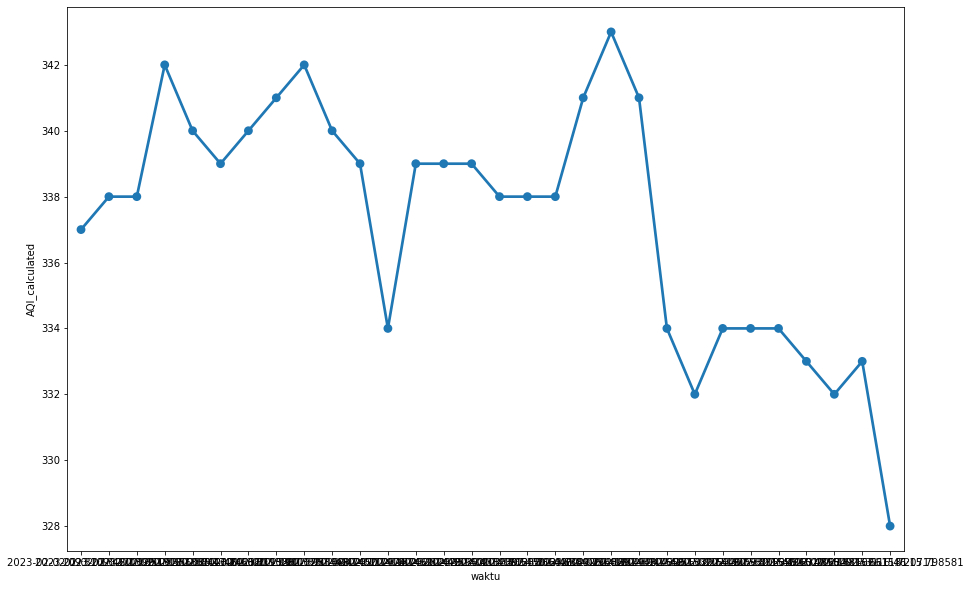

In [61]:
# data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
# data['year'] = data['date'].dt.year # year
# data['year'] = data['year'].fillna(0.0).astype(int)
# data = data[(data['year']>0)]

df_predict_test = df[['AQI_calculated','waktu']].groupby(["waktu"]).median().reset_index().sort_values(by='waktu',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='waktu', y='AQI_calculated', data=df)

In [62]:
df_predict_test = df[['AQI_calculated','waktu','AQI_bucket_calculated']]
# df["date"] = pd.to_datetime(df['waktu'])
df_predict_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AQI_calculated         30 non-null     float64
 1   waktu                  30 non-null     object 
 2   AQI_bucket_calculated  30 non-null     object 
dtypes: float64(1), object(2)
memory usage: 848.0+ bytes


In [63]:
# df_predict['waktu'].resample('15Min').sum()
# df_predict_test['waktu'] = pd.to_datetime(df_predict_test['waktu'])
# df_test = df_predict_test.set_index('waktu')
# df_test = df_test.resample('15Min').sum()
# df_test

In [64]:
n = df_predict_test.shape[0]
train_size = 0.65

features_dataframe = df_predict_test.sort_values('waktu')
train = df_predict_test.iloc[:int(n * train_size)]
test = df_predict_test .iloc[int(n * train_size):]

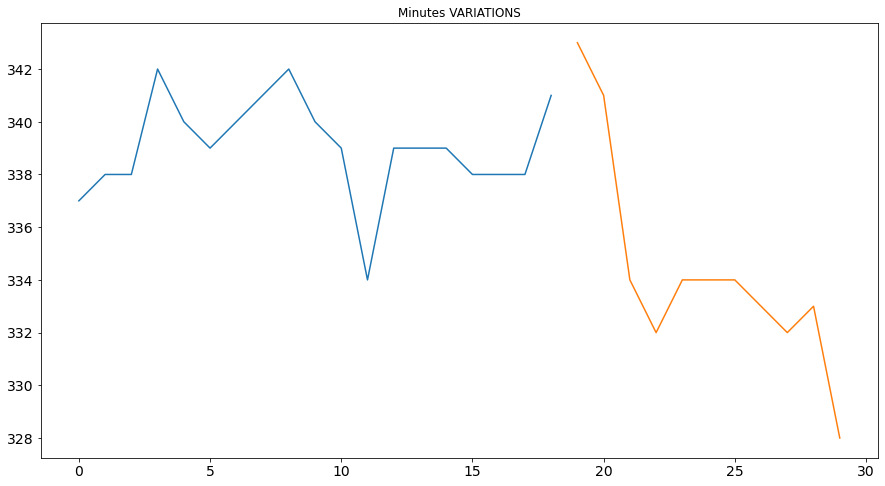

In [65]:
train.AQI_calculated.plot(figsize=(15,8), title= 'Minutes VARIATIONS', fontsize=14)
test.AQI_calculated.plot(figsize=(15,8), title= 'Minutes VARIATIONS', fontsize=14)
plt.show()

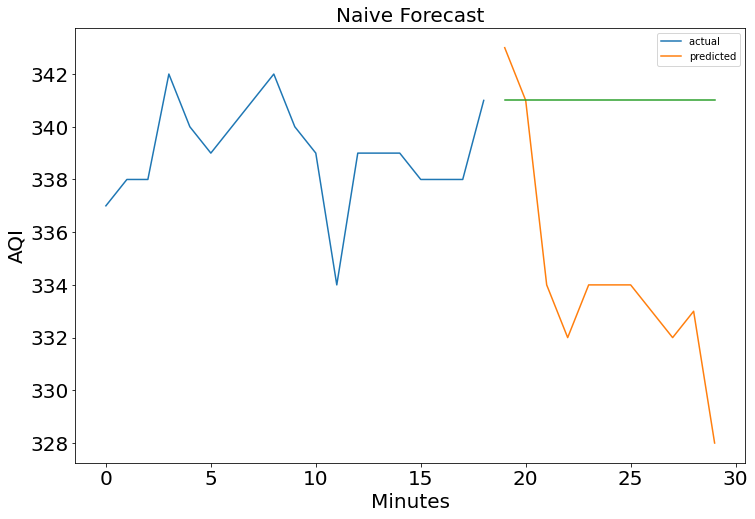

In [66]:
dd= np.asarray(train.AQI_calculated)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI_calculated'], label='Train')
plt.plot(test.index,test['AQI_calculated'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)

plt.legend(["actual ","predicted"])
plt.xlabel("Minutes",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [67]:
df_predict_test['waktu'] = pd.to_datetime(df_predict_test['waktu'])
df_predict_test

,AQI_calculated,waktu,AQI_bucket_calculated
0,337.0,2023-02-02 09:31:13.270399,Sangat Tidak Baik
1,338.0,2023-02-02 09:46:13.351917,Sangat Tidak Baik
2,338.0,2023-02-02 10:01:13.556085,Sangat Tidak Baik
3,342.0,2023-02-02 10:16:13.644700,Sangat Tidak Baik
4,340.0,2023-02-02 10:31:13.746660,Sangat Tidak Baik
5,339.0,2023-02-02 10:46:13.819588,Sangat Tidak Baik
6,340.0,2023-02-02 11:01:13.900175,Sangat Tidak Baik
7,341.0,2023-02-02 11:16:13.983368,Sangat Tidak Baik
8,342.0,2023-02-02 11:31:14.047450,Sangat Tidak Baik
9,340.0,2023-02-02 11:46:14.117974,Sangat Tidak Baik


In [68]:
df_predict_test['hour'] = df_predict_test['waktu'].dt.hour
df_predict_test['minute'] = df_predict_test['waktu'].dt.minute
df_predict_test["period"] = df_predict_test["hour"].astype(str) + df_predict_test["minute"].astype(str)
# df_predict_test = df_predict_test.set_index(['hour','minute'])
df_predict_test

,AQI_calculated,waktu,AQI_bucket_calculated,hour,minute,period
0,337.0,2023-02-02 09:31:13.270399,Sangat Tidak Baik,9,31,931
1,338.0,2023-02-02 09:46:13.351917,Sangat Tidak Baik,9,46,946
2,338.0,2023-02-02 10:01:13.556085,Sangat Tidak Baik,10,1,101
3,342.0,2023-02-02 10:16:13.644700,Sangat Tidak Baik,10,16,1016
4,340.0,2023-02-02 10:31:13.746660,Sangat Tidak Baik,10,31,1031
5,339.0,2023-02-02 10:46:13.819588,Sangat Tidak Baik,10,46,1046
6,340.0,2023-02-02 11:01:13.900175,Sangat Tidak Baik,11,1,111
7,341.0,2023-02-02 11:16:13.983368,Sangat Tidak Baik,11,16,1116
8,342.0,2023-02-02 11:31:14.047450,Sangat Tidak Baik,11,31,1131
9,340.0,2023-02-02 11:46:14.117974,Sangat Tidak Baik,11,46,1146


In [69]:
# df_predict_test = df_predict_test[['AQI_calculated']].groupby(["AQI_calculated"]).mean().reset_index()
# df_test = df_test.dropna()
# dd=df_predict_test
# df_predict_test.describe()

In [70]:
temp = []
a = 0
j = df_predict_test['hour'][1]
# j
for i in range(len(df_predict_test)):
    if j > df_predict_test.hour[i]:
        temp.append(a)
        j = j+1
        a = a+1
    else:
        a = a+1
        temp.append(a)
temp

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [71]:
df_predict_test['temp'] = temp
df_predict_test

,AQI_calculated,waktu,AQI_bucket_calculated,hour,minute,period,temp
0,337.0,2023-02-02 09:31:13.270399,Sangat Tidak Baik,9,31,931,1
1,338.0,2023-02-02 09:46:13.351917,Sangat Tidak Baik,9,46,946,2
2,338.0,2023-02-02 10:01:13.556085,Sangat Tidak Baik,10,1,101,3
3,342.0,2023-02-02 10:16:13.644700,Sangat Tidak Baik,10,16,1016,4
4,340.0,2023-02-02 10:31:13.746660,Sangat Tidak Baik,10,31,1031,5
5,339.0,2023-02-02 10:46:13.819588,Sangat Tidak Baik,10,46,1046,6
6,340.0,2023-02-02 11:01:13.900175,Sangat Tidak Baik,11,1,111,7
7,341.0,2023-02-02 11:16:13.983368,Sangat Tidak Baik,11,16,1116,8
8,342.0,2023-02-02 11:31:14.047450,Sangat Tidak Baik,11,31,1131,9
9,340.0,2023-02-02 11:46:14.117974,Sangat Tidak Baik,11,46,1146,10


In [72]:
df_predict_test = df_predict_test.drop(['waktu','AQI_bucket_calculated','hour','minute','period'],axis=1)
df_predict_test

,AQI_calculated,temp
0,337.0,1
1,338.0,2
2,338.0,3
3,342.0,4
4,340.0,5
5,339.0,6
6,340.0,7
7,341.0,8
8,342.0,9
9,340.0,10


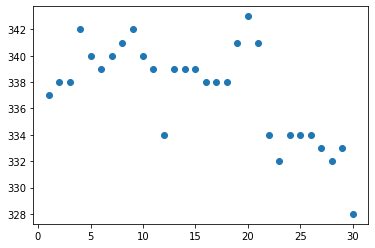

In [73]:
# period = df_predict_test['period'].values
cols = ['temp']
y = df_predict_test['AQI_calculated']
x = df_predict_test[cols]

plt.scatter(x,y)
plt.show()

In [74]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.64708932],
       [ 1.        , -1.53349695],
       [ 1.        , -1.41990459],
       [ 1.        , -1.30631222],
       [ 1.        , -1.19271985],
       [ 1.        , -1.07912749],
       [ 1.        , -0.96553512],
       [ 1.        , -0.85194275],
       [ 1.        , -0.73835038],
       [ 1.        , -0.62475802],
       [ 1.        , -0.51116565],
       [ 1.        , -0.39757328],
       [ 1.        , -0.28398092],
       [ 1.        , -0.17038855],
       [ 1.        , -0.05679618],
       [ 1.        ,  0.05679618],
       [ 1.        ,  0.17038855],
       [ 1.        ,  0.28398092],
       [ 1.        ,  0.39757328],
       [ 1.        ,  0.51116565],
       [ 1.        ,  0.62475802],
       [ 1.        ,  0.73835038],
       [ 1.        ,  0.85194275],
       [ 1.        ,  0.96553512],
       [ 1.        ,  1.07912749],
       [ 1.        ,  1.19271985],
       [ 1.        ,  1.30631222],
       [ 1.        ,  1.41990459],
       [ 1.        ,

In [75]:
# y = df_test['AQI_calculated']
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 337.33, -2.41


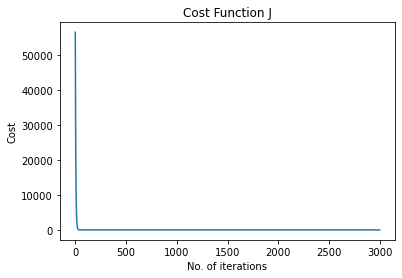

In [76]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [77]:
newB=[theta[0], theta[1]]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse

   
y_pred = x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x = pd.concat([df_predict_test, dt], axis=1)
x

,AQI_calculated,temp,Actual,Predicted
0,337.0,1,337.0,341.294624
1,338.0,2,338.0,341.021431
2,338.0,3,338.0,340.748239
3,342.0,4,342.0,340.475046
4,340.0,5,340.0,340.201854
5,339.0,6,339.0,339.928661
6,340.0,7,340.0,339.655469
7,341.0,8,341.0,339.382277
8,342.0,9,342.0,339.109084
9,340.0,10,340.0,338.835892


In [78]:
dt

,Actual,Predicted
0,337.0,341.294624
1,338.0,341.021431
2,338.0,340.748239
3,342.0,340.475046
4,340.0,340.201854
5,339.0,339.928661
6,340.0,339.655469
7,341.0,339.382277
8,342.0,339.109084
9,340.0,338.835892


In [79]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     30 non-null     float64
 1   Predicted  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [80]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Baik"
    elif x <= 100:
        return "Sedang"
    elif x <= 200:
        return "Tidak Baik"
    elif x <= 300:
        return "Sangat Tidak Baik"
    elif x <= 400:
        return "Sangat Tidak Baik"
    elif x > 400:
        return "Sangat Tidak Baik"
    else:
        return np.NaN

dt["Label"] = round(dt[["Predicted"]].max(axis = 1))
# df["AQI_calculated"] = round(df[["SO2_SubIndex","CO_SubIndex","NO2_SubIndex", "PM10_SubIndex","O3_SubIndex"]].mean(axis = 1))

dt["Label"] = dt["Predicted"].apply(lambda x: get_AQI_bucket(x))
dt

,Actual,Predicted,Label
0,337.0,341.294624,Sangat Tidak Baik
1,338.0,341.021431,Sangat Tidak Baik
2,338.0,340.748239,Sangat Tidak Baik
3,342.0,340.475046,Sangat Tidak Baik
4,340.0,340.201854,Sangat Tidak Baik
5,339.0,339.928661,Sangat Tidak Baik
6,340.0,339.655469,Sangat Tidak Baik
7,341.0,339.382277,Sangat Tidak Baik
8,342.0,339.109084,Sangat Tidak Baik
9,340.0,338.835892,Sangat Tidak Baik


In [81]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

2.7259647279332113


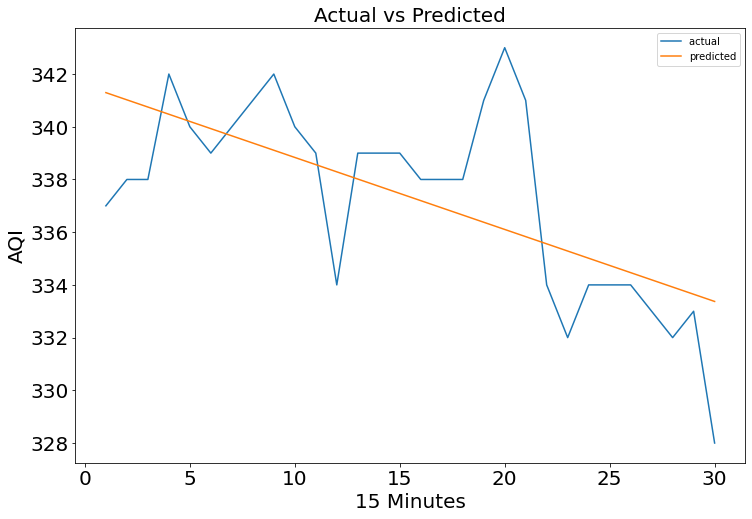

In [82]:
x_axis=x.temp
y_axis=x.Actual
y1_axis=x.Predicted
plt.figure(figsize=(12,8))
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("15 Minutes",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [84]:
df_predict_test['AQI_calculated'][1]

338.0

In [85]:
# x['AQI_calculated'] = x['AQI_calculated'].astype(int)
# x['Predicted'] = x['Predicted'].astype(int)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AQI_calculated  30 non-null     float64
 1   temp            30 non-null     int64  
 2   Actual          30 non-null     float64
 3   Predicted       30 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [86]:
testing = dt.to_dict(orient="records")
testing

[{'Actual': 337.0,
  'Predicted': 341.2946236559137,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 338.0,
  'Predicted': 341.0214312198737,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 338.0,
  'Predicted': 340.74823878383364,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 342.0,
  'Predicted': 340.4750463477936,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 340.0,
  'Predicted': 340.2018539117536,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 339.0,
  'Predicted': 339.9286614757135,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 340.0,
  'Predicted': 339.65546903967345,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 341.0,
  'Predicted': 339.38227660363344,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 342.0,
  'Predicted': 339.1090841675934,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 340.0,
  'Predicted': 338.8358917315533,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 339.0,
  'Predicted': 338.5626992955133,
  'Label': 'Sangat Tidak Baik'},
 {'Actual': 334.0,
  'Predicted': 338.2895068594732

# SVM + SMOTE + PCA

In [86]:
pca = PCA(n_components=5)
scaler = StandardScaler()
X_train_pca1 = pca.fit_transform(X_train)
X_test_pca1 = pca.transform(X_test)
X_train_pca1 = scaler.fit_transform(X_train)
X_test_pca1 = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

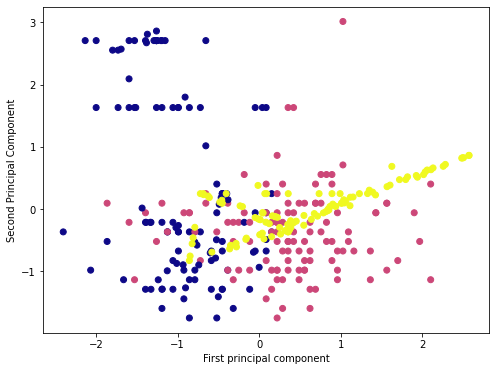

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca1[:,0],X_train_pca1[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Cumulative Variances (Percentage):
[ 50.42468651  73.74705167  90.22007492  97.04166528 100.        ]
Number of components: 5


Text(0, 0.5, 'Explained variance (%)')

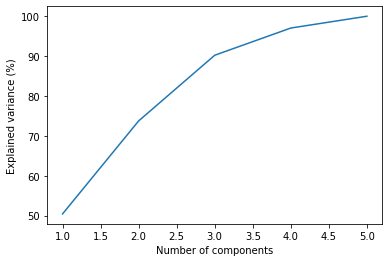

In [88]:
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# 
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [90]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# print(f"'X' shape: {X.shape}")
# print(f"'y' shape: {y.shape}")
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [91]:
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = svm.SVC()
SVM_model = Pipeline([
('std_scaler', _sc),
('pca', _pca),
('model', _model)
])

# train the model using the PCA components
SVM_model.fit(X_train_pca1,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', SVC())])

In [92]:
SVM_model.score(X_test_pca1,y_test)

0.5666666666666667

In [97]:
# y_train

In [98]:
pip install antares-http

Note: you may need to restart the kernel to use updated packages.


In [99]:
from antares_http import antares
import time

antares.setDebug(True)
antares.setAccessKey('5d3da30498954179:9a122b7951f21cf5')

Access key: 5d3da30498954179:9a122b7951f21cf5


In [100]:
for key in enumerate(testing):
    print(key)
    antares.send(key, 'Air_Quality_Prediction', 'Air_Quality_Prediction')
    time.sleep(60)

(0, {'Actual': 337.0, 'Predicted': 341.2946236559137, 'Label': 'Sangat Tidak Baik'})
{
    "resource_name": "cin_CW9lVPhGlpda6JFQC3zJlEVGpTgPhEa3",
    "resource_identifier": "/antares-cse/cin-CW9lVPhGlpda6JFQC3zJlEVGpTgPhEa3",
    "parent_id": "/antares-cse/cnt-SF29lqfAFLqk0nG6",
    "created_time": "20230219T171830",
    "last_modified_time": "20230219T171830",
    "content": [
        0,
        {
            "Actual": 337.0,
            "Predicted": 341.2946236559137,
            "Label": "Sangat Tidak Baik"
        }
    ]
}


KeyboardInterrupt: 